In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
iris = load_iris()
data = iris.data
feature_names = iris.feature_names
y = iris.target

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
df = pd.DataFrame(data, columns=feature_names)
df["sınıf"] = y
x = data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sınıf
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=4, whiten=True) # normalize eder

In [12]:
pca.fit(x)

PCA(n_components=4, whiten=True)

In [13]:
x_pca = pca.transform(x)

In [14]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [15]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

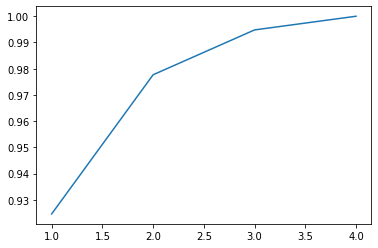

In [21]:
r = [i for i in range(1, 5)]
plt.plot(r, np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# different dataset 

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [44]:
pca = PCA(n_components = 4)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 4)


In [43]:
pca.components_

array([[ 5.47798909e-17, -1.73094651e-02, -2.23428835e-01,
        -1.35913305e-01, -3.30323071e-02, -9.66340839e-02,
        -8.32943798e-03,  2.26900090e-03, -3.20516488e-04,
        -1.19308904e-01, -2.44451675e-01,  1.48512746e-01,
        -4.67319408e-02, -2.17740746e-01, -1.48136772e-02,
         4.47779535e-03, -4.94136360e-05, -7.95419365e-02,
         8.33951452e-02,  2.15915341e-01, -1.72126802e-01,
        -1.63712099e-01,  2.86444464e-02,  4.23251817e-03,
         9.85488595e-05,  6.42319147e-02,  2.54093315e-01,
        -3.56771024e-02, -2.09462568e-01, -4.31311405e-02,
         5.13118700e-02,  2.13422739e-04,  0.00000000e+00,
         1.59950883e-01,  3.68690773e-01,  1.64406827e-01,
         8.52007904e-02,  3.72982857e-02,  2.15866982e-02,
         0.00000000e+00,  1.28865587e-03,  1.06945287e-01,
         3.03067457e-01,  2.47813042e-01,  2.09637295e-01,
         1.22325211e-02, -3.69458504e-02,  1.61485028e-03,
         6.93023567e-04, -8.35144210e-03, -5.58598978e-0

In [45]:
pca.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ])

In [46]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979])

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938])

In [49]:
pca.n_components

4

In [50]:
pca.singular_values_

array([567.0065665 , 542.25185421, 504.63059421, 426.11767607])

In [51]:
pca.whiten

False

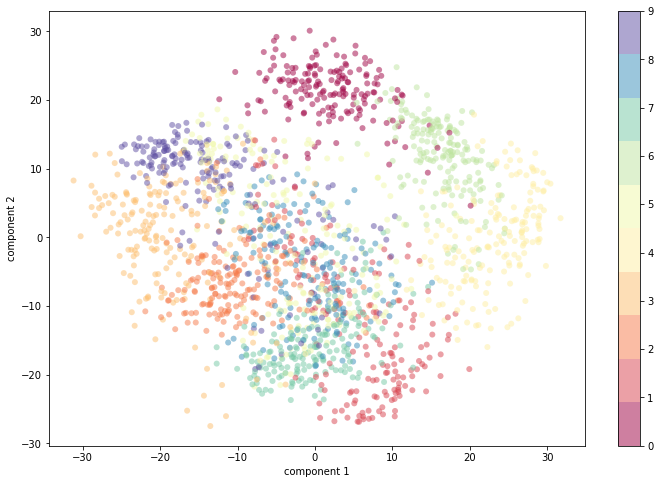

In [52]:
plt.figure(figsize=(12,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

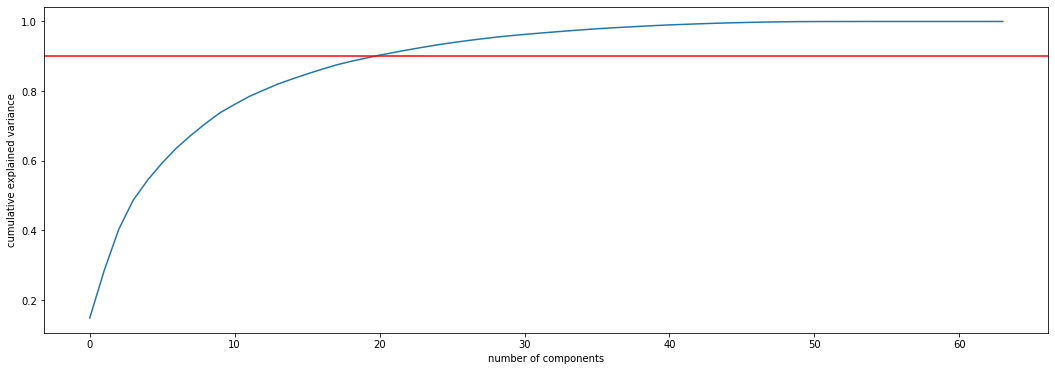

In [34]:
pca = PCA().fit(digits.data)
plt.figure(figsize=(18,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.90, c="r")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');